In [2]:
import numpy as np

import matplotlib.pyplot as plt


In [3]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [4]:
##normalizing the eqauation
##using inv to calculate the inverse form the np.linalg and using dot to multipy
X_b=np.c_[np.ones((100,1)),X]# add x0= 1 to each instance
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
#using y=4+3x+gaussian noise 
# lets see what the equation found 

theta_best

array([[4.0646134],
       [3.0039039]])

In [6]:
#now we make predictions using theta

X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]

y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.0646134],
       [10.0724212]])

In [7]:
#plotting the model predictions 

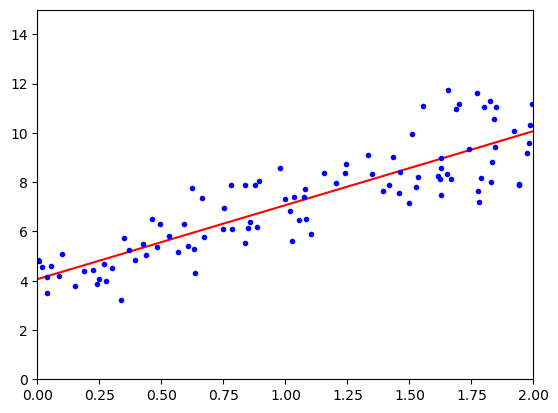

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## performing  linear regression using scikit learn is simple

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_


(array([4.0646134]), array([[3.0039039]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.0646134],
       [10.0724212]])

## implementation of calculating step for gradient descent

In [11]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)

In [13]:
for iteration in range(n_iterations):
    gradients=2/m* X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [14]:
theta

array([[4.0646134],
       [3.0039039]])

## implementing Stochastic gradient descent using simple learning schedule

In [15]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)


theta= np.random.randn(2,1)



In [16]:
for epoch in range(n_epochs):
        for i in range(m):
                random_index=np.random.randint(m)
                xi=X_b[random_index:random_index+1]
                yi=y[random_index:random_index+1]
                gradients=2*xi.T.dot(xi.dot(theta)-yi)
                eta=learning_schedule(epoch*m+i)
                theta=theta-eta*gradients

                

In [17]:
theta

array([[4.09130605],
       [3.0070177 ]])

**by convention we iterate the rounds of m iterations , each round is called epoch**

while batch gradient decsent goes through 1000 iterations , this only goes through 50 to produce a good result 

## linear regression using Stochastic GD using scikit-learn

In [18]:
from sklearn.linear_model import SGDRegressor
sdg_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sdg_reg.fit(X,y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [19]:
sdg_reg.intercept_,sdg_reg.coef_


(array([4.14237041]), array([3.17163634]))

## polynomial regression 



In [20]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5* X**2 +X+2+np.random.randn(m,1)



In [21]:
#the above data will never fit a straight line so we will now use polynomial regression to
# transfrom the data adding square (second degree polynomial) of each feature in the training set as  a new feature




In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([2.02279819])

In [23]:
X_poly[0]

array([2.02279819, 4.09171251])

now X_poly contains the original features of X plus the square of this feature, now we can fit a linear regression model to this extended training set 

In [24]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.23578773]), array([[1.01220206, 0.48064204]]))